In [1]:
import pandas as pd
import numpy as np

all_stats = pd.read_csv('../python_project_csv_files/2019-20_pbp.csv', header = [0])

pd.set_option("display.max_columns", None)

In [2]:
older_stats = pd.read_csv('../python_project_csv_files/2010-11_pbp.csv', header = [0])

pd.set_option("display.max_columns", None)

#older_stats.fillna('NaN', inplace=True)

older_stats.head(30)

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,PERSON2TYPE,PERSON3TYPE,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_ABBREVIATION,PLAYER1_TEAM_CITY,PLAYER1_TEAM_ID,PLAYER1_TEAM_NICKNAME,PLAYER2_ID,PLAYER2_NAME,PLAYER2_TEAM_ABBREVIATION,PLAYER2_TEAM_CITY,PLAYER2_TEAM_ID,PLAYER2_TEAM_NICKNAME,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
0,0,0,12,0,21000492,NaN,NaN,12:00,1,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:14 PM
1,1,0,10,1,21000492,Jump Ball Stoudemire vs. Foster: Tip to Collison,NaN,12:00,1,4.0,5,5,2405,Amar'e Stoudemire,NYK,New York,1.610613e+09,Knicks,1902,Jeff Foster,IND,Indiana,1.610613e+09,Pacers,201954,Darren Collison,IND,Indiana,1.610613e+09,Pacers,NaN,NaN,NaN,1:14 PM
2,2,1,2,2,21000492,NaN,NaN,11:46,1,5.0,0,0,2399,Mike Dunleavy,IND,Indiana,1.610613e+09,Pacers,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Dunleavy 25' 3PT Jump Shot,1:15 PM
3,3,0,4,3,21000492,NaN,NaN,11:45,1,3.0,0,0,1610612754,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pacers Rebound,1:15 PM
4,4,1,2,4,21000492,NaN,NaN,11:40,1,5.0,0,0,201954,Darren Collison,IND,Indiana,1.610613e+09,Pacers,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Collison 11' Jump Shot,1:15 PM
5,5,0,4,5,21000492,NaN,NaN,11:39,1,5.0,0,0,2399,Mike Dunleavy,IND,Indiana,1.610613e+09,Pacers,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dunleavy REBOUND (Off:1 Def:0),1:15 PM
6,6,5,2,6,21000492,NaN,NaN,11:37,1,5.0,0,0,2399,Mike Dunleavy,IND,Indiana,1.610613e+09,Pacers,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Dunleavy 2' Layup,1:15 PM
7,7,0,4,7,21000492,NaN,NaN,11:36,1,5.0,0,0,201954,Darren Collison,IND,Indiana,1.610613e+09,Pacers,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Collison REBOUND (Off:1 Def:0),1:15 PM
8,8,1,2,8,21000492,NaN,NaN,11:31,1,5.0,0,0,101122,Danny Granger,IND,Indiana,1.610613e+09,Pacers,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Granger 24' 3PT Jump Shot,1:15 PM
9,9,0,4,9,21000492,Chandler REBOUND (Off:0 Def:1),NaN,11:31,1,4.0,0,0,201163,Wilson Chandler,NYK,New York,1.610613e+09,Knicks,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:15 PM


In [3]:
older_stats.fillna('',inplace=True)
older_stats['Play'] = older_stats["VISITORDESCRIPTION"] + older_stats["HOMEDESCRIPTION"]
older_stats

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,PERSON2TYPE,PERSON3TYPE,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_ABBREVIATION,PLAYER1_TEAM_CITY,PLAYER1_TEAM_ID,PLAYER1_TEAM_NICKNAME,PLAYER2_ID,PLAYER2_NAME,PLAYER2_TEAM_ABBREVIATION,PLAYER2_TEAM_CITY,PLAYER2_TEAM_ID,PLAYER2_TEAM_NICKNAME,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING,Play
0,0,0,12,0,21000492,,,12:00,1,0.0,0,0,0,,,,,,0,,,,,,0,,,,,,,,,1:14 PM,
1,1,0,10,1,21000492,Jump Ball Stoudemire vs. Foster: Tip to Collison,,12:00,1,4.0,5,5,2405,Amar'e Stoudemire,NYK,New York,1610612752.0,Knicks,1902,Jeff Foster,IND,Indiana,1610612754.0,Pacers,201954,Darren Collison,IND,Indiana,1610612754.0,Pacers,,,,1:14 PM,Jump Ball Stoudemire vs. Foster: Tip to Collison
2,2,1,2,2,21000492,,,11:46,1,5.0,0,0,2399,Mike Dunleavy,IND,Indiana,1610612754.0,Pacers,0,,,,,,0,,,,,,,,MISS Dunleavy 25' 3PT Jump Shot,1:15 PM,MISS Dunleavy 25' 3PT Jump Shot
3,3,0,4,3,21000492,,,11:45,1,3.0,0,0,1610612754,,,,,,0,,,,,,0,,,,,,,,Pacers Rebound,1:15 PM,Pacers Rebound
4,4,1,2,4,21000492,,,11:40,1,5.0,0,0,201954,Darren Collison,IND,Indiana,1610612754.0,Pacers,0,,,,,,0,,,,,,,,MISS Collison 11' Jump Shot,1:15 PM,MISS Collison 11' Jump Shot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550984,425,12,3,506,21001044,,,0:34,4,5.0,0,0,101138,Brandon Bass,ORL,Orlando,1610612753.0,Magic,0,,,,,,0,,,,,,97 - 86,-11,Bass Free Throw 2 of 2 (22 PTS),9:21 PM,Bass Free Throw 2 of 2 (22 PTS)
550985,426,26,6,509,21001044,Harris Offensive Charge Foul (P2.PN),,0:22,4,4.0,5,1,202412,Manny Harris,CLE,Cleveland,1610612739.0,Cavaliers,2202,Jason Richardson,ORL,Orlando,1610612753.0,Magic,0,,,,,,,,,9:21 PM,Harris Offensive Charge Foul (P2.PN)
550986,427,5,5,510,21001044,Harris Foul Turnover (P1.T15),,0:22,4,4.0,0,1,202412,Manny Harris,CLE,Cleveland,1610612739.0,Cavaliers,0,,,,,,0,,,,,,,,,9:21 PM,Harris Foul Turnover (P1.T15)
550987,428,0,8,511,21001044,,,0:22,4,5.0,5,0,2202,Jason Richardson,ORL,Orlando,1610612753.0,Magic,2768,Chris Duhon,ORL,Orlando,1610612753.0,Magic,0,,,,,,,,SUB: Duhon FOR Richardson,9:22 PM,SUB: Duhon FOR Richardson


In [37]:
import re

older_stats['Play'] = older_stats['Play'].apply(lambda row: row if re.findall("\d'",row) != [] else np.nan)
older_stats.dropna(subset=['Play'],inplace=True)

older_stats['ShotDist'] = older_stats['Play'].apply(lambda row: re.findall("\d+'",row)[0][0:2] if len(re.findall("\d+'",row)[0]) == 3 else re.findall("\d+'",row)[0][0:1])

older_stats['ShotOutcome'] = older_stats['Play'].apply(lambda row: 'miss' if 'MISS' in row else 'make')
older_stats['ShotType'] = older_stats['Play'].apply(lambda row: '3PT' if '3PT' in row else '2PT')
#older_stats['3-pointers'] = older_stats['Play'].apply(lambda row: '3PT' in row)

#two_pointers = older_stats[['ShotDist','ShotOutcome','ShotType']]
#three_pointers = older_stats[['ShotDist','ShotOutcome','ShotType']]
refined_df = older_stats[['ShotType','ShotDist','ShotOutcome']]

refined_df.groupby(['ShotType','ShotDist']).apply(lambda row: ((row['ShotOutcome']=='miss').count()/(row['ShotOutcome']=='make').count()))

#two_pointers = refined_df[['ShotDist','makes']]

#older_stats['ShotDist'] = older_stats['Play'].apply(lambda row: float(row[(row.find("'")-2):row.find("'")]))

#older_stats['ShotDist'] = older_stats["HOMEDESCRIPTION"].apply(lambda row: row[(row.find("'")-2):row.find("'")] if row.find("'") != -1 else 'NaN')
#older_stats = older_stats[older_stats['ShotDist'] != 'NaN'].reset_index(drop=True)
#older_stats.head(50)
#older_stats['ShotDist'][1]
#older_stats['ShotType'] = older_stats['Play'].apply(lambda row: 3row.find("3PT"))

ShotType  ShotDist
2PT       1           1.0
          10          1.0
          11          1.0
          12          1.0
          13          1.0
                     ... 
3PT       82          1.0
          83          1.0
          84          1.0
          85          1.0
          90          1.0
Length: 87, dtype: float64

In [5]:
all_stats

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,AwayScore,HomeTeam,HomePlay,HomeScore,Shooter,ShotType,ShotOutcome,ShotDist,Assister,Blocker,FoulType,Fouler,Fouled,Rebounder,ReboundType,ViolationPlayer,ViolationType,TimeoutTeam,FreeThrowShooter,FreeThrowOutcome,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss,Unnamed: 40
0,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,720,NOP,Jump ball: D. Favors vs. M. Gasol (L. Ball gai...,0,TOR,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D. Favors - favorde01,M. Gasol - gasolma01,L. Ball - balllo01,NaN
1,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,708,NOP,L. Ball misses 2-pt jump shot from 11 ft,0,TOR,NaN,0,L. Ball - balllo01,2-pt jump shot,miss,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,Offensive rebound by D. Favors,0,TOR,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D. Favors - favorde01,offensive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,D. Favors makes 2-pt layup at rim,2,TOR,NaN,0,D. Favors - favorde01,2-pt layup,make,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,689,NOP,NaN,2,TOR,O. Anunoby misses 2-pt layup from 3 ft,0,O. Anunoby - anunoog01,2-pt layup,miss,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539260,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,29,LAL,NaN,103,MIA,K. Olynyk makes 2-pt layup from 2 ft,90,K. Olynyk - olynyke01,2-pt layup,make,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539261,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,20,LAL,D. Howard makes 3-pt jump shot from 30 ft (ass...,106,MIA,NaN,90,D. Howard - howardw01,3-pt jump shot,make,30.0,A. Caruso - carusal01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539262,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,15,LAL,NaN,106,MIA,S. Hill makes 3-pt jump shot from 29 ft,93,S. Hill - hillso01,3-pt jump shot,make,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539263,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,0,LAL,End of 4th quarter,106,MIA,NaN,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
some_stats = all_stats[['GameType','WinningTeam','Quarter','AwayTeam','AwayPlay','HomeTeam','HomePlay','Shooter','ShotType','ShotOutcome','ShotDist']]
some_stats

,GameType,WinningTeam,Quarter,AwayTeam,AwayPlay,HomeTeam,HomePlay,Shooter,ShotType,ShotOutcome,ShotDist
0,regular,TOR,1,NOP,Jump ball: D. Favors vs. M. Gasol (L. Ball gai...,TOR,NaN,NaN,NaN,NaN,NaN
1,regular,TOR,1,NOP,L. Ball misses 2-pt jump shot from 11 ft,TOR,NaN,L. Ball - balllo01,2-pt jump shot,miss,11.0
2,regular,TOR,1,NOP,Offensive rebound by D. Favors,TOR,NaN,NaN,NaN,NaN,NaN
3,regular,TOR,1,NOP,D. Favors makes 2-pt layup at rim,TOR,NaN,D. Favors - favorde01,2-pt layup,make,0.0
4,regular,TOR,1,NOP,NaN,TOR,O. Anunoby misses 2-pt layup from 3 ft,O. Anunoby - anunoog01,2-pt layup,miss,3.0
...,...,...,...,...,...,...,...,...,...,...,...
539260,playoff,LAL,4,LAL,NaN,MIA,K. Olynyk makes 2-pt layup from 2 ft,K. Olynyk - olynyke01,2-pt layup,make,2.0
539261,playoff,LAL,4,LAL,D. Howard makes 3-pt jump shot from 30 ft (ass...,MIA,NaN,D. Howard - howardw01,3-pt jump shot,make,30.0
539262,playoff,LAL,4,LAL,NaN,MIA,S. Hill makes 3-pt jump shot from 29 ft,S. Hill - hillso01,3-pt jump shot,make,29.0
539263,playoff,LAL,4,LAL,End of 4th quarter,MIA,NaN,NaN,NaN,NaN,NaN


In [7]:
shooting = some_stats[some_stats['Shooter'].notna()].reset_index().drop(columns = 'index')
shooting

,GameType,WinningTeam,Quarter,AwayTeam,AwayPlay,HomeTeam,HomePlay,Shooter,ShotType,ShotOutcome,ShotDist
0,regular,TOR,1,NOP,L. Ball misses 2-pt jump shot from 11 ft,TOR,NaN,L. Ball - balllo01,2-pt jump shot,miss,11.0
1,regular,TOR,1,NOP,D. Favors makes 2-pt layup at rim,TOR,NaN,D. Favors - favorde01,2-pt layup,make,0.0
2,regular,TOR,1,NOP,NaN,TOR,O. Anunoby misses 2-pt layup from 3 ft,O. Anunoby - anunoog01,2-pt layup,miss,3.0
3,regular,TOR,1,NOP,J. Holiday misses 2-pt layup from 8 ft,TOR,NaN,J. Holiday - holidjr01,2-pt layup,miss,8.0
4,regular,TOR,1,NOP,NaN,TOR,K. Lowry misses 3-pt jump shot from 25 ft,K. Lowry - lowryky01,3-pt jump shot,miss,25.0
...,...,...,...,...,...,...,...,...,...,...,...
202392,playoff,LAL,4,LAL,Q. Cook misses 3-pt jump shot from 27 ft,MIA,NaN,Q. Cook - cookqu01,3-pt jump shot,miss,27.0
202393,playoff,LAL,4,LAL,NaN,MIA,K. Nunn misses 3-pt jump shot from 26 ft,K. Nunn - nunnke01,3-pt jump shot,miss,26.0
202394,playoff,LAL,4,LAL,NaN,MIA,K. Olynyk makes 2-pt layup from 2 ft,K. Olynyk - olynyke01,2-pt layup,make,2.0
202395,playoff,LAL,4,LAL,D. Howard makes 3-pt jump shot from 30 ft (ass...,MIA,NaN,D. Howard - howardw01,3-pt jump shot,make,30.0


In [8]:
two_point_shots = shooting[shooting['ShotType'].str.contains('2')].reset_index().drop(columns = 'index')
two_point_shots.count()[0]
two_point_shots

,GameType,WinningTeam,Quarter,AwayTeam,AwayPlay,HomeTeam,HomePlay,Shooter,ShotType,ShotOutcome,ShotDist
0,regular,TOR,1,NOP,L. Ball misses 2-pt jump shot from 11 ft,TOR,NaN,L. Ball - balllo01,2-pt jump shot,miss,11.0
1,regular,TOR,1,NOP,D. Favors makes 2-pt layup at rim,TOR,NaN,D. Favors - favorde01,2-pt layup,make,0.0
2,regular,TOR,1,NOP,NaN,TOR,O. Anunoby misses 2-pt layup from 3 ft,O. Anunoby - anunoog01,2-pt layup,miss,3.0
3,regular,TOR,1,NOP,J. Holiday misses 2-pt layup from 8 ft,TOR,NaN,J. Holiday - holidjr01,2-pt layup,miss,8.0
4,regular,TOR,1,NOP,D. Favors misses 2-pt jump shot from 12 ft,TOR,NaN,D. Favors - favorde01,2-pt jump shot,miss,12.0
...,...,...,...,...,...,...,...,...,...,...,...
124048,playoff,LAL,4,LAL,R. Rondo misses 2-pt jump shot from 11 ft,MIA,NaN,R. Rondo - rondora01,2-pt jump shot,miss,11.0
124049,playoff,LAL,4,LAL,L. James makes 2-pt layup from 2 ft,MIA,NaN,L. James - jamesle01,2-pt layup,make,2.0
124050,playoff,LAL,4,LAL,NaN,MIA,K. Olynyk makes 2-pt layup from 3 ft (assist b...,K. Olynyk - olynyke01,2-pt layup,make,3.0
124051,playoff,LAL,4,LAL,NaN,MIA,S. Hill makes 2-pt jump shot from 11 ft (assis...,S. Hill - hillso01,2-pt jump shot,make,11.0


In [9]:
all_shots = shooting[shooting['ShotType'].str.contains('2|3')].reset_index().drop(columns = 'index')

In [29]:
two_point_shots = shooting[shooting['ShotType'].str.contains('2')].reset_index().drop(columns='index')
two_point_shots.count()[0]

124053

In [10]:
two_point_makes = two_point_shots[two_point_shots['ShotOutcome'] == 'make'].reset_index().drop(columns='index')
two_point_makes.count()[0]

65018

In [11]:
three_point_shots = shooting[shooting['ShotType'].str.contains('3')].reset_index().drop(columns='index')
three_point_shots.count()[0]

78344

In [12]:
three_point_makes = three_point_shots[three_point_shots['ShotOutcome'] == 'make'].reset_index().drop(columns='index')
three_point_makes.count()[0]

28061

In [13]:
print(two_point_makes.count()[0]/two_point_shots.count()[0])
print(three_point_makes.count()[0]/three_point_shots.count()[0])
print(three_point_makes.count()[0]/three_point_shots.count()[0]*1.5)

0.5241146929135128
0.3581767589094251
0.5372651383641376


In [14]:
shot_makes = shooting[shooting['ShotOutcome'] == 'make'].reset_index().drop(columns = 'index')
shot_makes_dist = shot_makes['ShotDist']
all_shots_dist = shooting['ShotDist']
shot_makes_dist

0         0.0
1        16.0
2        25.0
3        25.0
4        22.0
         ... 
93074    27.0
93075    11.0
93076     2.0
93077    30.0
93078    29.0
Name: ShotDist, Length: 93079, dtype: float64

(array([4.4900e+03, 1.6809e+04, 1.2942e+04, 5.3690e+03, 2.4140e+03,
        1.7420e+03, 1.7780e+03, 1.5890e+03, 1.5170e+03, 1.3690e+03,
        1.4200e+03, 1.3240e+03, 1.4560e+03, 1.3890e+03, 1.2210e+03,
        1.2180e+03, 1.2500e+03, 1.2350e+03, 1.1930e+03, 1.0850e+03,
        9.3400e+02, 6.3400e+02, 9.6100e+02, 4.3970e+03, 2.7560e+03,
        6.8710e+03, 7.5960e+03, 3.5460e+03, 1.3930e+03, 5.4700e+02,
        2.7000e+02, 1.1200e+02, 5.8000e+01, 3.1000e+01, 1.8000e+01,
        1.9000e+01, 1.6000e+01, 3.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40.]),
 <BarContainer object of 40 artists>)

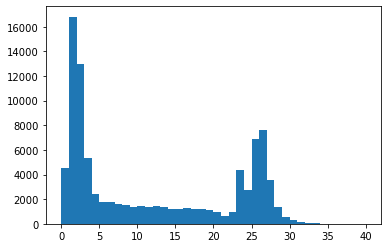

In [15]:
from matplotlib import pyplot as plt
plt.hist(shot_makes_dist, bins = 40, range = (0,40))

(array([6.0390e+03, 2.2860e+04, 2.0852e+04, 1.1235e+04, 6.3460e+03,
        4.7140e+03, 4.5740e+03, 3.9210e+03, 3.7720e+03, 3.3660e+03,
        3.4260e+03, 3.2770e+03, 3.3880e+03, 3.2660e+03, 2.9360e+03,
        2.9120e+03, 3.0360e+03, 2.9460e+03, 2.8870e+03, 2.6240e+03,
        2.3330e+03, 1.6150e+03, 2.5410e+03, 1.1191e+04, 7.3890e+03,
        1.9050e+04, 2.1522e+04, 1.0120e+04, 4.1190e+03, 1.6660e+03,
        7.8400e+02, 3.7300e+02, 1.9500e+02, 1.0600e+02, 8.6000e+01,
        6.6000e+01, 5.5000e+01, 3.0000e+01, 1.9000e+01, 4.4000e+01]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40.]),
 <BarContainer object of 40 artists>)

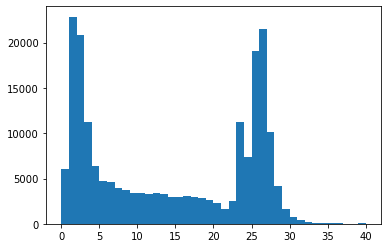

In [16]:
plt.hist(all_shots_dist, bins = 40, range = (0,40))

In [17]:
#plot field goal percentage at each distance from the basket.
#Even better, plot EFG % at each distance - one plot for 2-pts and one plot for 3-pts
#Overlay them on each other?

In [18]:

two_point_shots = shooting[shooting['ShotType'].str.contains('2')].reset_index().drop(columns = 'index')
#two_point_makes = two_point_shots[two_point_shots['ShotOutcome'] == 'make'].reset_index().drop(columns='index')
#shot_makes_dist = shot_makes['ShotDist']
two_points_grouped = two_point_shots.groupby(['ShotDist','ShotOutcome'])['ShotOutcome'].count()
makes = []
misses = []
total = []
for i in range(25):
    makes.append(two_points_grouped[i][0])
    misses.append(two_points_grouped[i][1])
    total.append(two_points_grouped[i][0] + two_points_grouped[i][1])

FG = [makes[x]/total[x] for x in range(len(makes))]

#three_point_shots.groupby(['ShotDist','ShotOutcome'])

<BarContainer object of 25 artists>

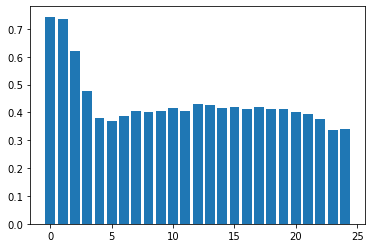

In [19]:
plt.bar(list(range(25)),FG)

In [20]:
three_point_shots = three_point_shots.loc[(three_point_shots['ShotDist'] >= 22) & (three_point_shots['ShotDist'] <= 45)]
three_point_shots

,GameType,WinningTeam,Quarter,AwayTeam,AwayPlay,HomeTeam,HomePlay,Shooter,ShotType,ShotOutcome,ShotDist
0,regular,TOR,1,NOP,NaN,TOR,K. Lowry misses 3-pt jump shot from 25 ft,K. Lowry - lowryky01,3-pt jump shot,miss,25.0
1,regular,TOR,1,NOP,NaN,TOR,O. Anunoby makes 3-pt jump shot from 25 ft (as...,O. Anunoby - anunoog01,3-pt jump shot,make,25.0
2,regular,TOR,1,NOP,L. Ball makes 3-pt jump shot from 25 ft (assis...,TOR,NaN,L. Ball - balllo01,3-pt jump shot,make,25.0
3,regular,TOR,1,NOP,J. Holiday misses 3-pt jump shot from 26 ft,TOR,NaN,J. Holiday - holidjr01,3-pt jump shot,miss,26.0
4,regular,TOR,1,NOP,B. Ingram makes 3-pt jump shot from 22 ft (ass...,TOR,NaN,B. Ingram - ingrabr01,3-pt jump shot,make,22.0
...,...,...,...,...,...,...,...,...,...,...,...
78339,playoff,LAL,4,LAL,J. Dudley misses 3-pt jump shot from 26 ft,MIA,NaN,J. Dudley - dudleja01,3-pt jump shot,miss,26.0
78340,playoff,LAL,4,LAL,Q. Cook misses 3-pt jump shot from 27 ft,MIA,NaN,Q. Cook - cookqu01,3-pt jump shot,miss,27.0
78341,playoff,LAL,4,LAL,NaN,MIA,K. Nunn misses 3-pt jump shot from 26 ft,K. Nunn - nunnke01,3-pt jump shot,miss,26.0
78342,playoff,LAL,4,LAL,D. Howard makes 3-pt jump shot from 30 ft (ass...,MIA,NaN,D. Howard - howardw01,3-pt jump shot,make,30.0


In [21]:
two_point_shots = two_point_shots.loc[two_point_shots['ShotDist'] <= 24]
fg_percent = pd.DataFrame(two_point_shots.groupby(['ShotDist','ShotOutcome'])['ShotOutcome'].count().groupby('ShotDist').apply(lambda x: x/sum(x))).rename(columns={'ShotOutcome':'fg_percent'})
fg_percent = fg_percent[fg_percent.index.get_level_values('ShotOutcome') == 'make']
fg_percent = fg_percent.reset_index().drop(columns = 'ShotOutcome')

<BarContainer object of 25 artists>

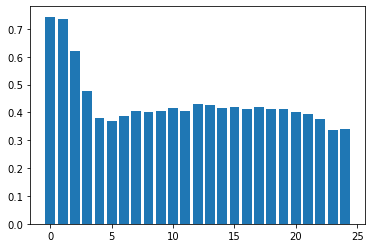

In [22]:
plt.bar(fg_percent['ShotDist'],fg_percent['fg_percent'])

In [23]:
three_point_shots = three_point_shots.loc[(three_point_shots['ShotDist'] >= 22) & (three_point_shots['ShotDist'] <= 45)]
fg_percent = pd.DataFrame(three_point_shots.groupby(['ShotDist','ShotOutcome'])['ShotOutcome'].count().groupby('ShotDist').apply(lambda x: x/sum(x))).rename(columns={'ShotOutcome':'fg_percent'})
#fg_percent[fg_percent.index.contains('make')]
fg_percent = fg_percent[fg_percent.index.get_level_values('ShotOutcome') == 'make']
fg_percent = fg_percent.reset_index().drop(columns = 'ShotOutcome')
fg_percent['efg_percent'] = (fg_percent['fg_percent'] * 1.5)

<BarContainer object of 22 artists>

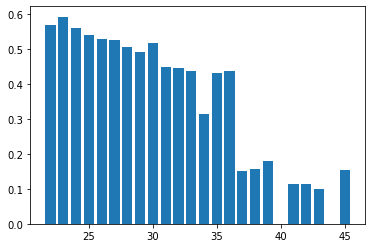

In [24]:
plt.bar(fg_percent['ShotDist'],fg_percent['efg_percent'])

In [25]:
all_shots = all_shots.loc[all_shots['ShotDist'] <= 40]
fg_percent = pd.DataFrame(all_shots.groupby(['ShotDist','ShotOutcome'])['ShotOutcome'].count().groupby('ShotDist').apply(lambda x: x/sum(x))).rename(columns={'ShotOutcome':'fg_percent'})
fg_percent = fg_percent[fg_percent.index.get_level_values('ShotOutcome') == 'make']
fg_percent = fg_percent.reset_index().drop(columns = 'ShotOutcome')

<BarContainer object of 40 artists>

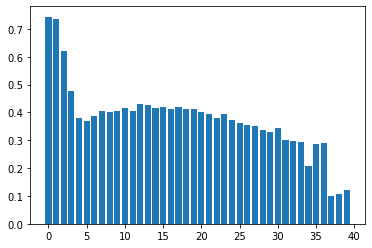

In [26]:
plt.bar(fg_percent['ShotDist'],fg_percent['fg_percent'])

In [27]:
#new_df = three_point_shots.groupby(['ShotDist','ShotOutcome']).apply(lambda x: x/sum(x))

# new_df
#pd.concat([new_df, df.groupby(["Region","Income Group"]).apply(lambda x: x.shape[0])], axis=1)

In [28]:
new_df = df.groupby(["Region","Income Group"])["GDP"].agg(["mean","std", "sum"]).apply(lambda x: x/sum(x))
\

SyntaxError: unexpected EOF while parsing (<ipython-input-28-505488bc0387>, line 2)

In [ ]:
new_df = df.groupby(["Region","Income Group"])["GDP"].agg(["mean","std", "sum"])
# new_df
pd.concat([new_df, df.groupby(["Region","Income Group"]).apply(lambda x: x.shape[0])], axis=1)

In [ ]:
new_df = df.groupby(["Region","Income Group"])["GDP"].agg(["mean","std", "sum"]).apply(lambda x: x/sum(x))
\

In [ ]:
new_df = df.groupby(["Region","Income Group"])["GDP"].agg(["mean","std", "sum"])
# new_df
pd.concat([new_df, df.groupby(["Region","Income Group"]).apply(lambda x: x.shape[0])], axis=1)

In [ ]:
makes_ = []
misses_ = []
total_ = []
for i in range(22,46):
    makes_.append(two_points_grouped[i][0])
    misses_.append(two_points_grouped[i][1])
    total_.append(two_points_grouped[i][0] + two_points_grouped[i][1])

FG = [makes_[x]/total_[x] for x in range(len(makes))]

In [ ]:
plt.bar(list(range(25)),FG)